**Nesse projeto irei analisar uma base de dados que apresenta informações de diversas pessoas, com diversas idades e que praticam exercícios, com isso irei desenvolver um modelo de machine learning onde seja possível adivinhar qual o gênero da pessoa a partir de seus dados.**


Base de dados: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset
## Dicionário da tabela:
*.Idade: Idade do membro da academia.*

*.Gênero: Gênero do membro da academia (Masculino ou Feminino).*

*.Peso (kg): Peso do membro em quilogramas.*

*.Altura (m): Altura do membro em metros.*

*.Frequência_Cardíaca_Máx: Frequência cardíaca máxima (batimentos por minuto) durante as sessões de treino.*

*.Frequência_Cardíaca_Média: Frequência cardíaca média durante as sessões de treino.*

*.Frequência_Cardíaca_Repouso: Frequência cardíaca em repouso antes do treino.*

*.Duração_Sessão (horas): Duração de cada sessão de treino em horas.*

*.Calorias_Queimadas: Total de calorias queimadas durante cada sessão.*  

*.Tipo_Treino: Tipo de treino realizado (ex.: Cardio, Força, Yoga, HIIT).*  

*.Percentual_Gordura: Percentual de gordura corporal do membro.*

*.Ingestão_Água (litros): Quantidade de água ingerida diariamente durante os treinos.*

*.Frequência_Treino (dias/semana): Número de sessões de treino por semana.*

*.Nível_Experiência: Nível de experiência, de iniciante (1) a especialista (3).*  

*.IMC: Índice de Massa Corporal, calculado a partir da altura e do peso.*

# Visualização dos dados

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [118]:
base_gym = pd.read_csv("gym_members_exercise_tracking.csv")
base_gym

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [119]:
base_gym.describe()
#Com essa visualização podemos ver diversas informações da tabela ao mesmo tempo, como por exemplo podemos notar que não existem célular vazias;
#Podemos ver a média de todas as variáveis, idade por exemplo = 38.683453;
#Além de também podermos ver o BPM mais alto de toda a tabela = 199 BPM;

#Podemos concluir que não será necessário nenhum tratamento de dados para realizarmos essa análise!

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [120]:
grafico = px.scatter_matrix(
    base_gym,
    dimensions=['Avg_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Age'],
    color='Gender',
    title='Matriz de Dispersão - Gym Data',
    height=700
)

grafico.update_traces(diagonal_visible=False)  #esconde histogramas na diagonal
grafico.show()

In [121]:
filtro = base_gym[(base_gym['Age'] == 59) & (base_gym['Calories_Burned'] == 1418)]
filtro

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
943,59,Male,85.5,1.67,190,144,71,1.99,1418.0,Cardio,15.0,3.5,5,3,30.66


In [122]:
filtro = base_gym[(base_gym['Age'] == 58) & (base_gym['Calories_Burned'] == 1463)]
filtro

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
930,58,Female,59.3,1.58,166,165,56,1.97,1463.0,Strength,19.8,2.7,4,3,23.75


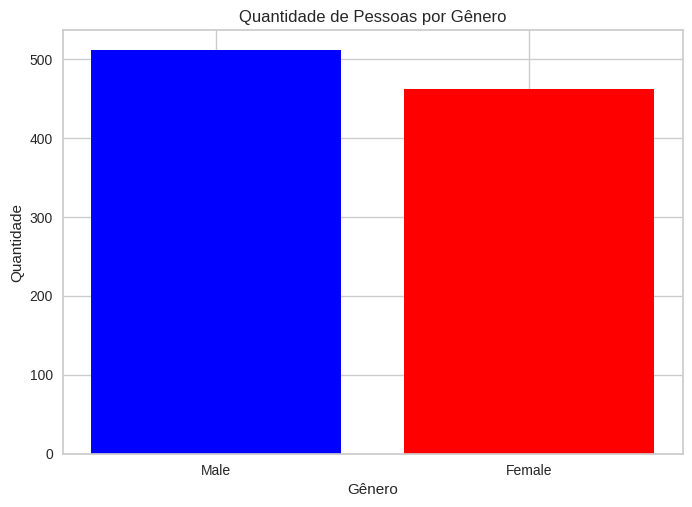

In [123]:
contagem_genero = base_gym['Gender'].value_counts()

plt.bar(contagem_genero.index, contagem_genero.values, color=['blue', 'red'])

plt.title('Quantidade de Pessoas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')

plt.show()

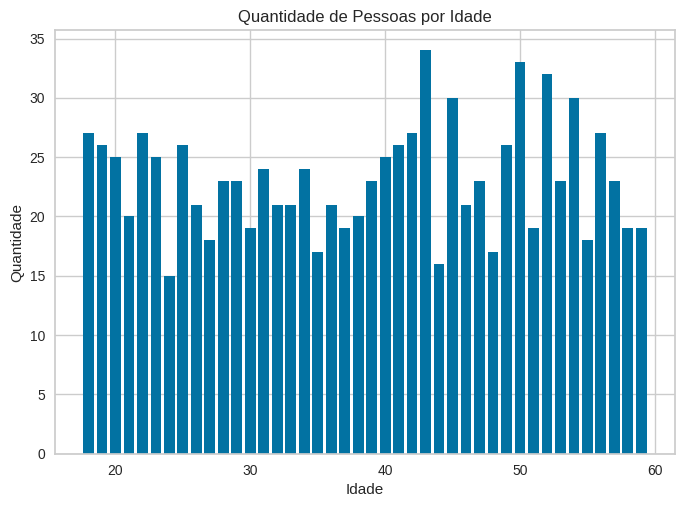

In [124]:
contagem_idade = base_gym['Age'].value_counts()

plt.bar(contagem_idade.index, contagem_idade.values)

plt.title('Quantidade de Pessoas por Idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade')

plt.show()

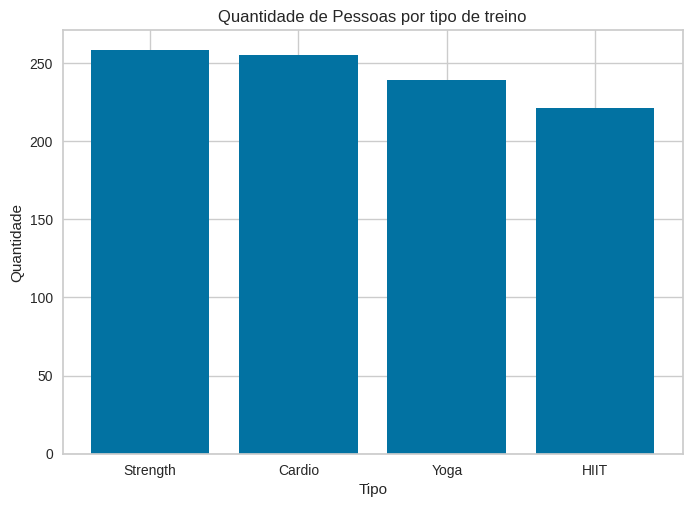

In [125]:
contagem_tipo = base_gym['Workout_Type'].value_counts()

plt.bar(contagem_tipo.index, contagem_tipo.values)

plt.title('Quantidade de Pessoas por tipo de treino')
plt.xlabel('Tipo')
plt.ylabel('Quantidade')

plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Cardio'),
  Text(1, 0, 'HIIT'),
  Text(2, 0, 'Strength'),
  Text(3, 0, 'Yoga')])

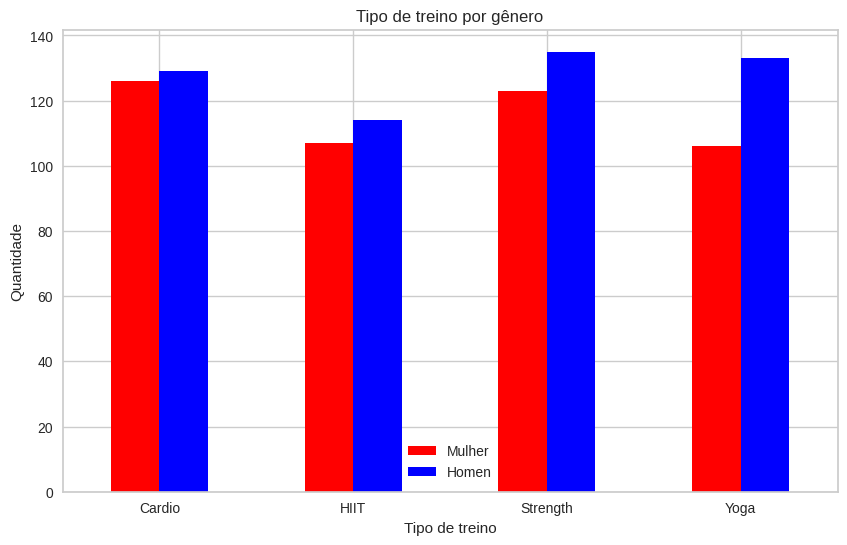

In [126]:
pd.crosstab(base_gym.Workout_Type, base_gym.Gender).plot(kind="bar", figsize=(10,6), color=["red", "blue"])

plt.title("Tipo de treino por gênero")
plt.xlabel("Tipo de treino")
plt.ylabel("Quantidade")
plt.legend(["Mulher", "Homen"])
plt.xticks(rotation=0)

## Calculando a correlação

In [127]:
from sklearn.preprocessing import LabelEncoder

# Criando uma cópia para não alterar o original (opcional)
base_gym_encoded = base_gym.copy()

# LabelEncoder para 'Gender'
le_gender = LabelEncoder()
base_gym_encoded['Gender'] = le_gender.fit_transform(base_gym['Gender'])

# LabelEncoder para 'Workout_Type'
le_workout = LabelEncoder()
base_gym_encoded['Workout_Type'] = le_workout.fit_transform(base_gym['Workout_Type'])


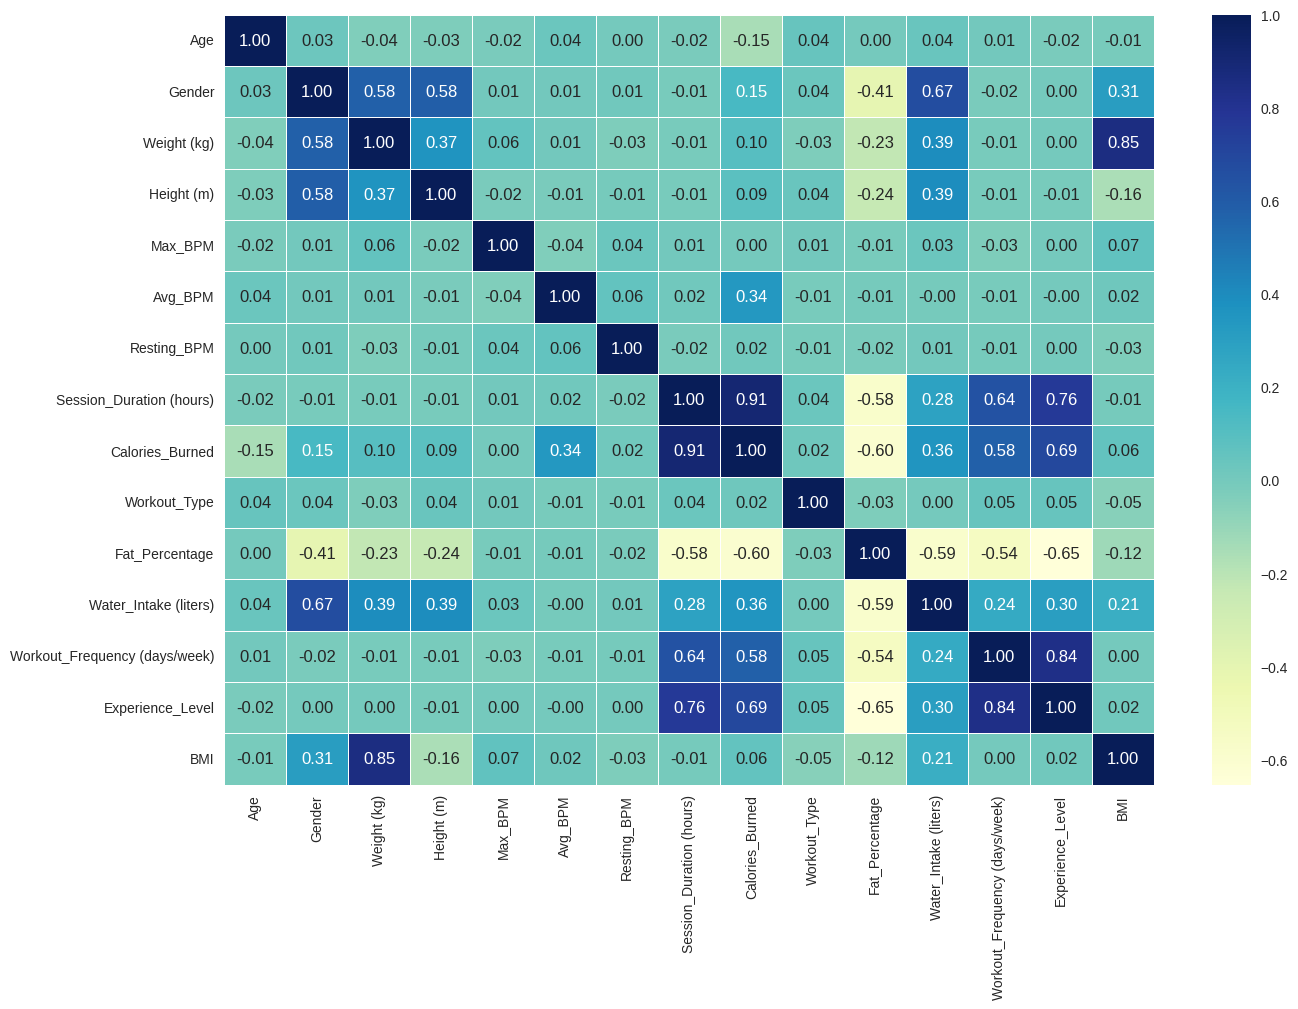

In [128]:
corr_matrix = base_gym_encoded.select_dtypes(include=np.number).corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="YlGnBu");

# Pevendo qual o tipo de exercício que a pessoa realiza com técnicas de machine learning

## Divisão entre previsores e classes

In [129]:
X1 = base_gym.iloc[:, 0:9]

X2 = base_gym.iloc[:, 10:]

x_gym = np.concatenate([X1.values, X2.values], axis=1)

In [130]:
x_gym

array([[56, 'Male', 88.3, ..., 4.0, 3.0, 30.2],
       [46, 'Female', 74.9, ..., 4.0, 2.0, 32.0],
       [32, 'Female', 68.1, ..., 4.0, 2.0, 24.71],
       ...,
       [59, 'Female', 60.4, ..., 5.0, 3.0, 19.5],
       [32, 'Male', 126.4, ..., 3.0, 2.0, 37.74],
       [46, 'Male', 88.7, ..., 2.0, 1.0, 33.38]], dtype=object)

In [131]:
y_gym = base_gym.iloc[:, 9].values

In [132]:
y_gym

array(['Yoga', 'HIIT', 'Cardio', 'Strength', 'Strength', 'HIIT', 'Cardio',
       'Cardio', 'Strength', 'Cardio', 'HIIT', 'HIIT', 'Cardio', 'HIIT',
       'Yoga', 'Strength', 'HIIT', 'Cardio', 'Strength', 'HIIT',
       'Strength', 'Cardio', 'Yoga', 'Yoga', 'HIIT', 'Yoga', 'HIIT',
       'Strength', 'HIIT', 'HIIT', 'HIIT', 'Yoga', 'HIIT', 'Cardio',
       'HIIT', 'Strength', 'Cardio', 'Strength', 'Strength', 'Strength',
       'Cardio', 'Cardio', 'Yoga', 'Cardio', 'HIIT', 'Strength', 'Yoga',
       'Cardio', 'Strength', 'Cardio', 'Yoga', 'Cardio', 'Cardio',
       'Strength', 'HIIT', 'Cardio', 'Yoga', 'Cardio', 'Cardio', 'HIIT',
       'Strength', 'Yoga', 'Strength', 'Strength', 'Strength', 'Cardio',
       'HIIT', 'Cardio', 'Yoga', 'HIIT', 'Strength', 'HIIT', 'Yoga',
       'Cardio', 'Cardio', 'Strength', 'Cardio', 'Cardio', 'Yoga', 'HIIT',
       'Cardio', 'Yoga', 'Yoga', 'Strength', 'Yoga', 'Strength', 'Cardio',
       'Strength', 'Yoga', 'HIIT', 'HIIT', 'Cardio', 'Cardio', 'HIIT',


## Transformando em número

In [133]:
from sklearn.preprocessing import LabelEncoder

In [134]:
label_encoder_teste = LabelEncoder()

In [135]:
x_gym [:,1]

array(['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female',
       '

In [136]:
label_encoder_teste = LabelEncoder()

teste = label_encoder_teste.fit_transform(x_gym[:,1])
teste

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,

In [137]:
label_encoder_gender = LabelEncoder()

In [138]:
x_gym[:,1] = label_encoder_gender.fit_transform(x_gym[:,1])

In [139]:
x_gym[0]

array([56, 1, 88.3, 1.71, 180, 157, 60, 1.69, 1313.0, 12.6, 3.5, 4.0, 3.0,
       30.2], dtype=object)

## Dividir entre treinamento e teste

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
x_gym_treinamento, x_gym_teste, y_gym_treinamento, y_gym_teste = train_test_split(x_gym, y_gym, test_size = 0.15, random_state = 0)

In [142]:
x_gym_treinamento.shape, y_gym_treinamento.shape

((827, 14), (827,))

In [143]:
x_gym_teste.shape, y_gym_teste.shape

((146, 14), (146,))

## Salvando variáveis

In [144]:
import pickle

In [145]:
with open('gym.pkl', mode = 'wb') as f:
  pickle.dump([x_gym_treinamento, y_gym_treinamento, x_gym_teste, y_gym_teste], f)

## Random Forest - 28.08%

In [146]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
random_forest_gym = RandomForestClassifier(n_estimators=400, criterion='entropy', random_state = 0)
random_forest_gym.fit(x_gym_treinamento, y_gym_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=400, random_state=0)

In [148]:
previsoes = random_forest_gym.predict(x_gym_teste)
previsoes

array(['Yoga', 'Cardio', 'Cardio', 'Yoga', 'Yoga', 'Yoga', 'HIIT', 'HIIT',
       'Yoga', 'Strength', 'HIIT', 'HIIT', 'Cardio', 'Cardio', 'Strength',
       'Yoga', 'Cardio', 'Cardio', 'Yoga', 'Strength', 'Cardio', 'Cardio',
       'Yoga', 'Cardio', 'Yoga', 'Strength', 'Yoga', 'Yoga', 'Yoga',
       'Yoga', 'Yoga', 'Strength', 'Cardio', 'HIIT', 'Yoga', 'Yoga',
       'Yoga', 'Cardio', 'Cardio', 'Strength', 'HIIT', 'HIIT', 'Strength',
       'Cardio', 'Cardio', 'Strength', 'HIIT', 'Cardio', 'Yoga', 'Cardio',
       'Strength', 'HIIT', 'Cardio', 'Yoga', 'HIIT', 'Yoga', 'Yoga',
       'Strength', 'Cardio', 'Cardio', 'Strength', 'Cardio', 'Cardio',
       'Yoga', 'Cardio', 'Cardio', 'Cardio', 'Cardio', 'Yoga', 'Yoga',
       'Cardio', 'Strength', 'Cardio', 'Yoga', 'Strength', 'HIIT',
       'Cardio', 'Yoga', 'Cardio', 'Strength', 'Yoga', 'Yoga', 'Strength',
       'HIIT', 'Cardio', 'Yoga', 'Strength', 'Strength', 'HIIT', 'Cardio',
       'HIIT', 'Cardio', 'Cardio', 'HIIT', 'Yoga', 'Cardio'

In [149]:
y_gym_teste

array(['Yoga', 'HIIT', 'Cardio', 'Yoga', 'Strength', 'HIIT', 'Yoga',
       'Yoga', 'HIIT', 'Strength', 'HIIT', 'Cardio', 'Yoga', 'HIIT',
       'Yoga', 'Cardio', 'Cardio', 'Strength', 'HIIT', 'Cardio', 'Yoga',
       'Strength', 'Strength', 'HIIT', 'Strength', 'Strength', 'Yoga',
       'Yoga', 'Strength', 'Yoga', 'HIIT', 'Yoga', 'Strength', 'Strength',
       'Strength', 'Cardio', 'Strength', 'HIIT', 'HIIT', 'Strength',
       'Cardio', 'Cardio', 'HIIT', 'Strength', 'Strength', 'Strength',
       'Strength', 'HIIT', 'HIIT', 'HIIT', 'Strength', 'Yoga', 'Cardio',
       'Cardio', 'Cardio', 'Cardio', 'Yoga', 'Strength', 'HIIT', 'HIIT',
       'Yoga', 'Cardio', 'HIIT', 'HIIT', 'Strength', 'Strength',
       'Strength', 'Cardio', 'Strength', 'Yoga', 'Strength', 'Yoga',
       'HIIT', 'Yoga', 'Cardio', 'Strength', 'Yoga', 'Strength', 'Cardio',
       'Yoga', 'Cardio', 'Yoga', 'HIIT', 'HIIT', 'Cardio', 'Cardio',
       'Yoga', 'Yoga', 'Strength', 'Yoga', 'Strength', 'Strength', 'Yoga',
    

In [150]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_gym_teste, previsoes)

0.2808219178082192

0.2808219178082192

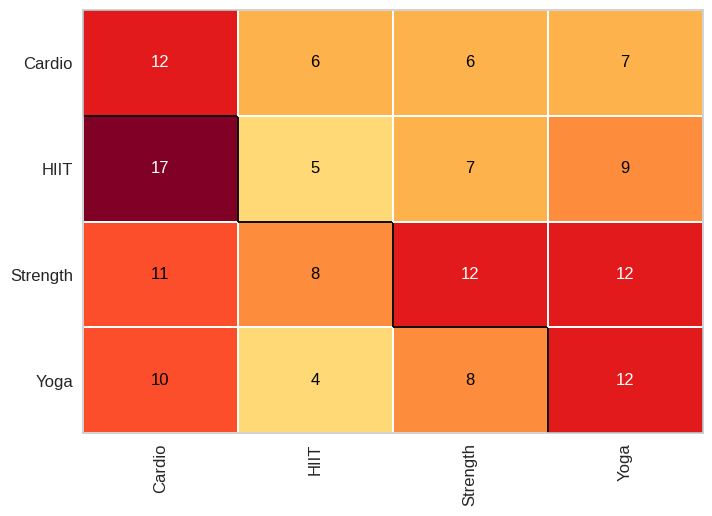

In [151]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_gym)
cm.fit(x_gym_treinamento, y_gym_treinamento)
cm.score(x_gym_teste, y_gym_teste)

# Prevendo o gênero da pessoa com técnicas de machine learning

## Dividindo entre previsores e classe

In [152]:
X1 = base_gym.iloc[:, 0]

X2 = base_gym.iloc[:, 2:]

x_gym = np.concatenate([X1.values.reshape(-1, 1), X2.values], axis=1)

In [153]:
x_gym

array([[56, 88.3, 1.71, ..., 4, 3, 30.2],
       [46, 74.9, 1.53, ..., 4, 2, 32.0],
       [32, 68.1, 1.66, ..., 4, 2, 24.71],
       ...,
       [59, 60.4, 1.76, ..., 5, 3, 19.5],
       [32, 126.4, 1.83, ..., 3, 2, 37.74],
       [46, 88.7, 1.63, ..., 2, 1, 33.38]], dtype=object)

In [154]:
y_gym = base_gym.iloc[:, 1].values

In [155]:
y_gym

array(['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female',
       '

## Transformando em número

In [156]:
label_encoder_teste = LabelEncoder()

teste = label_encoder_teste.fit_transform(x_gym[:,8])
teste

array([3, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 3, 2, 1, 0, 2, 1, 2, 0,
       3, 3, 1, 3, 1, 2, 1, 1, 1, 3, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 3, 0,
       1, 2, 3, 0, 2, 0, 3, 0, 0, 2, 1, 0, 3, 0, 0, 1, 2, 3, 2, 2, 2, 0,
       1, 0, 3, 1, 2, 1, 3, 0, 0, 2, 0, 0, 3, 1, 0, 3, 3, 2, 3, 2, 0, 2,
       3, 1, 1, 0, 0, 1, 2, 0, 3, 0, 2, 0, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2,
       1, 2, 3, 1, 2, 3, 0, 1, 3, 0, 3, 2, 2, 0, 2, 3, 0, 3, 3, 3, 2, 2,
       3, 1, 3, 3, 0, 3, 2, 0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 0, 3, 0, 3, 3,
       2, 3, 0, 0, 2, 1, 0, 3, 0, 0, 0, 1, 3, 2, 0, 3, 3, 2, 0, 1, 3, 2,
       1, 3, 0, 3, 1, 1, 0, 0, 2, 0, 2, 1, 1, 3, 3, 2, 0, 0, 3, 1, 2, 1,
       1, 0, 2, 1, 3, 3, 0, 3, 3, 1, 3, 3, 1, 0, 0, 2, 3, 1, 2, 0, 0, 1,
       2, 2, 1, 1, 2, 0, 3, 0, 1, 2, 2, 3, 2, 3, 0, 0, 2, 2, 1, 1, 2, 2,
       0, 2, 1, 0, 3, 1, 1, 0, 3, 1, 2, 1, 0, 0, 0, 1, 3, 2, 0, 3, 2, 0,
       2, 2, 3, 2, 0, 3, 1, 1, 3, 1, 2, 0, 2, 3, 0, 3, 3, 3, 2, 0, 0, 0,
       2, 1, 2, 2, 3, 0, 0, 1, 1, 3, 0, 1, 1, 0, 2,

In [157]:
x_gym[:,8]

array(['Yoga', 'HIIT', 'Cardio', 'Strength', 'Strength', 'HIIT', 'Cardio',
       'Cardio', 'Strength', 'Cardio', 'HIIT', 'HIIT', 'Cardio', 'HIIT',
       'Yoga', 'Strength', 'HIIT', 'Cardio', 'Strength', 'HIIT',
       'Strength', 'Cardio', 'Yoga', 'Yoga', 'HIIT', 'Yoga', 'HIIT',
       'Strength', 'HIIT', 'HIIT', 'HIIT', 'Yoga', 'HIIT', 'Cardio',
       'HIIT', 'Strength', 'Cardio', 'Strength', 'Strength', 'Strength',
       'Cardio', 'Cardio', 'Yoga', 'Cardio', 'HIIT', 'Strength', 'Yoga',
       'Cardio', 'Strength', 'Cardio', 'Yoga', 'Cardio', 'Cardio',
       'Strength', 'HIIT', 'Cardio', 'Yoga', 'Cardio', 'Cardio', 'HIIT',
       'Strength', 'Yoga', 'Strength', 'Strength', 'Strength', 'Cardio',
       'HIIT', 'Cardio', 'Yoga', 'HIIT', 'Strength', 'HIIT', 'Yoga',
       'Cardio', 'Cardio', 'Strength', 'Cardio', 'Cardio', 'Yoga', 'HIIT',
       'Cardio', 'Yoga', 'Yoga', 'Strength', 'Yoga', 'Strength', 'Cardio',
       'Strength', 'Yoga', 'HIIT', 'HIIT', 'Cardio', 'Cardio', 'HIIT',


In [158]:
label_encoder_gender = LabelEncoder()

In [159]:
x_gym[:,8] = label_encoder_gender.fit_transform(x_gym[:,8])

In [160]:
x_gym[0]

array([56, 88.3, 1.71, 180, 157, 60, 1.69, 1313.0, 3, 12.6, 3.5, 4, 3,
       30.2], dtype=object)

## Dividir entre treinamento e teste

In [161]:
x_gym_treinamento, x_gym_teste, y_gym_treinamento, y_gym_teste = train_test_split(x_gym, y_gym, test_size = 0.15, random_state = 0)

In [162]:
x_gym_treinamento.shape, y_gym_treinamento.shape

((827, 14), (827,))

In [163]:
x_gym_teste.shape, y_gym_teste.shape

((146, 14), (146,))

## Salvando as variáveis

In [164]:
with open('gym_2.pkl', mode = 'wb') as f:
  pickle.dump([x_gym_treinamento, y_gym_treinamento, x_gym_teste, y_gym_teste], f)

## Naïve Bayes - 89.04%

In [165]:
from sklearn.naive_bayes import GaussianNB


In [166]:
naive_risco_gym = GaussianNB()
naive_risco_gym.fit(x_gym_treinamento, y_gym_treinamento)

GaussianNB()

In [167]:
previsoes = naive_risco_gym.predict(x_gym_teste)
previsoes

array(['Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Femal

In [168]:
accuracy_score(y_gym_teste, previsoes)

0.8904109589041096

0.8904109589041096

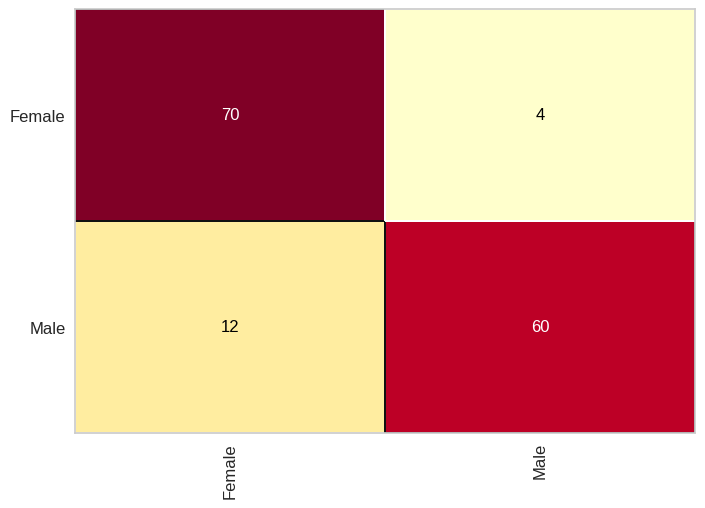

In [169]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(naive_risco_gym)
cm.fit(x_gym_treinamento, y_gym_treinamento)
cm.score(x_gym_teste, y_gym_teste)

## Árvore de decisão - 97.26%

In [170]:
from sklearn.tree import DecisionTreeClassifier

In [171]:
arvore_gym = DecisionTreeClassifier(criterion='entropy')
arvore_gym.fit(x_gym_treinamento, y_gym_treinamento)

DecisionTreeClassifier(criterion='entropy')

In [172]:
previsoes = arvore_gym.predict(x_gym_teste)
accuracy_score(y_gym_teste, previsoes)

0.9726027397260274

0.9726027397260274

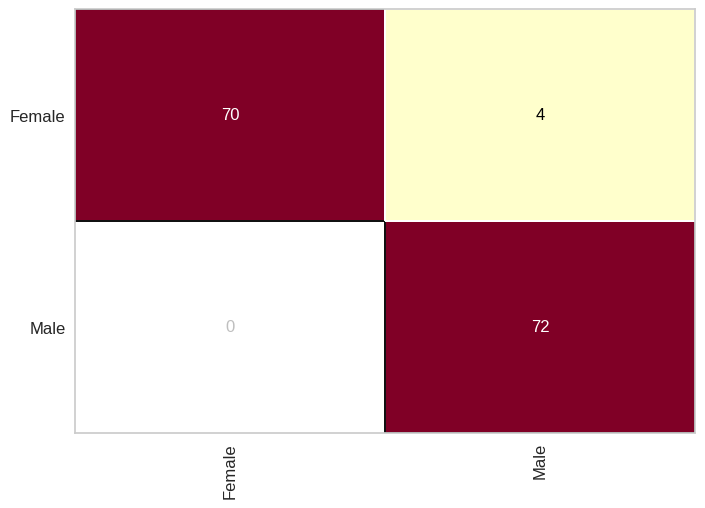

In [173]:
cm = ConfusionMatrix(arvore_gym)
cm.fit(x_gym_treinamento, y_gym_treinamento)
cm.score(x_gym_teste, y_gym_teste)

## Random Forest - 100%

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
random_forest_gym = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state = 0)
random_forest_gym.fit(x_gym_treinamento, y_gym_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

In [176]:
previsoes = random_forest_gym.predict(x_gym_teste)
accuracy_score(y_gym_teste, previsoes)

1.0

1.0

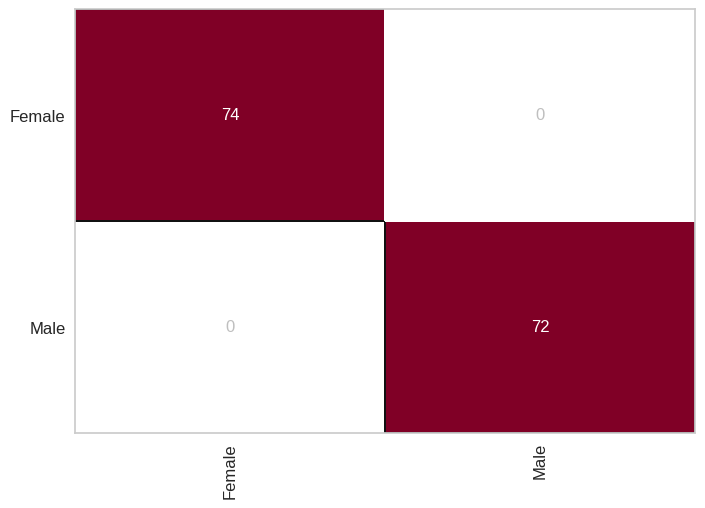

In [177]:
cm = ConfusionMatrix(random_forest_gym)
cm.fit(x_gym_treinamento, y_gym_treinamento)
cm.score(x_gym_teste, y_gym_teste)

## KNN - 95.20%

In [178]:
from sklearn.neighbors import KNeighborsClassifier

### Para a utilização desse modelo e dos próximos, é recomendável realizar uma padronização das variáveis para ocorrer um melhor desempenho

In [179]:
from sklearn.preprocessing import StandardScaler

scaler_gym = StandardScaler()
x_gym = scaler_gym.fit_transform(x_gym)

In [180]:
x_gym[0]

array([ 1.42234256,  0.6814925 , -0.09854471,  0.01008143,  0.92297044,
       -0.30355488,  1.26459826,  1.49569004,  1.33848518, -1.97832071,
        1.45596686,  0.74329509,  1.60978416,  0.7942783 ])

In [181]:
x_gym_treinamento, x_gym_teste, y_gym_treinamento, y_gym_teste = train_test_split(x_gym, y_gym, test_size = 0.15, random_state = 0)

In [182]:
with open('gym_vetores.pkl', mode = 'wb') as f:
  pickle.dump([x_gym_treinamento, y_gym_treinamento, x_gym_teste, y_gym_teste], f)

In [183]:
knn_gym = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 1)
knn_gym.fit(x_gym_treinamento, y_gym_treinamento)

KNeighborsClassifier(p=1)

In [184]:
previsoes = knn_gym.predict(x_gym_teste)
accuracy_score(y_gym_teste, previsoes)

0.952054794520548

0.952054794520548

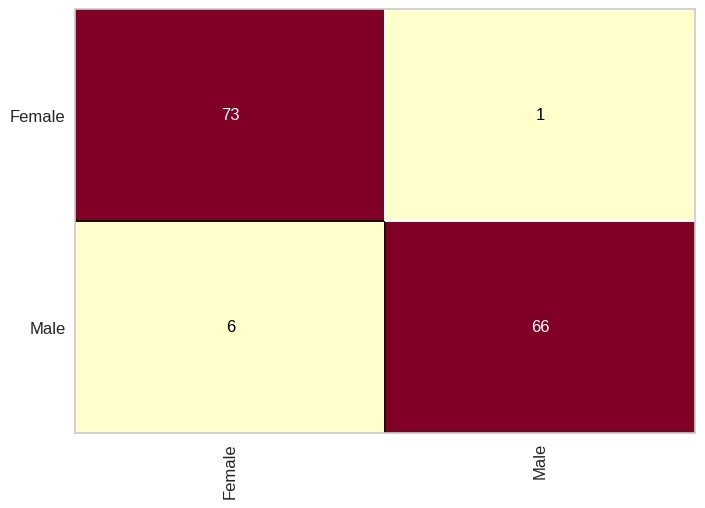

In [185]:
cm = ConfusionMatrix(knn_gym)
cm.fit(x_gym_treinamento, y_gym_treinamento)
cm.score(x_gym_teste, y_gym_teste)

## Regressão logística - 97.26%

In [186]:
from sklearn.linear_model import LogisticRegression

In [187]:
logistic_gym = LogisticRegression(random_state = 1)
logistic_gym.fit(x_gym_treinamento, y_gym_treinamento)

LogisticRegression(random_state=1)

In [188]:
previsoes = logistic_gym.predict(x_gym_teste)
accuracy_score(y_gym_teste, previsoes)

0.9726027397260274

0.9726027397260274

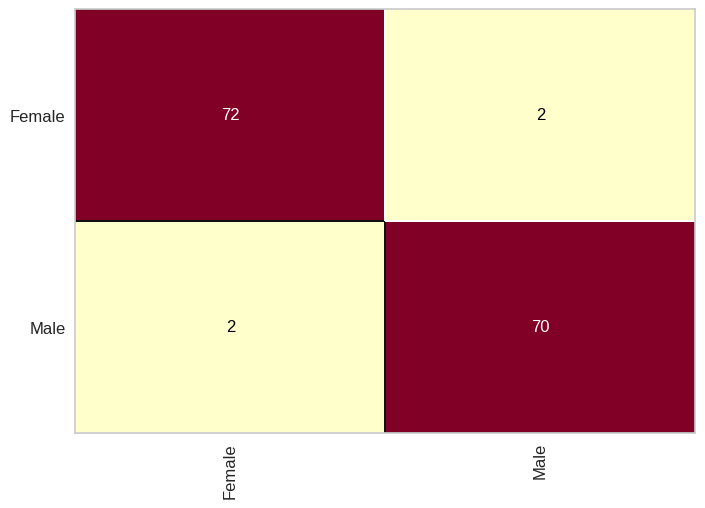

In [189]:
cm = ConfusionMatrix(logistic_gym)
cm.fit(x_gym_treinamento, y_gym_treinamento)
cm.score(x_gym_teste, y_gym_teste)

## SVM - 99.31%

In [190]:
from sklearn.svm import SVC

In [191]:
svm_gym = SVC(kernel='rbf', random_state=1, C = 2.0)
svm_gym.fit(x_gym_treinamento, y_gym_treinamento)

SVC(C=2.0, random_state=1)

In [192]:
previsoes = svm_gym.predict(x_gym_teste)
accuracy_score(y_gym_teste, previsoes)

0.9931506849315068

0.9931506849315068

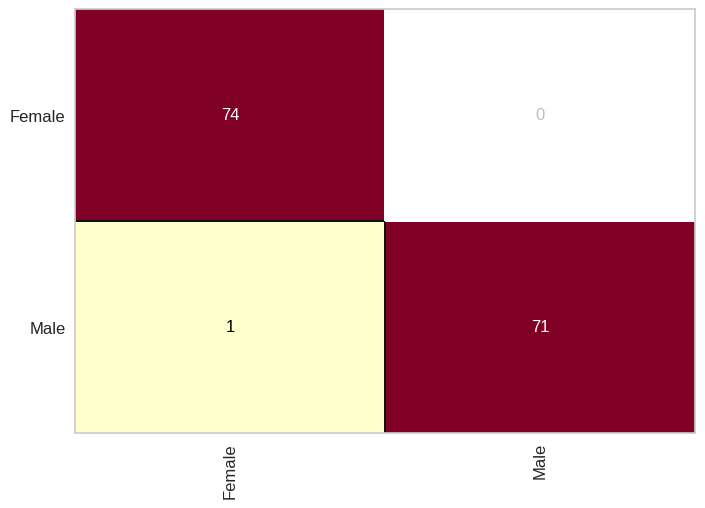

In [193]:
cm = ConfusionMatrix(svm_gym)
cm.fit(x_gym_treinamento, y_gym_treinamento)
cm.score(x_gym_teste, y_gym_teste)